# Electricity Demand Estimation For Leading Electricity Distributor

### Business Context:

One of leading electricity Distribution Company would like to understand demand for electricity for the next 1-2 years to manage the production of electricity and managing the vendors for the same. It is one of the important exercises to getting accurate estimation of demand so that they can procure or produce the electricity as per the demand.


## Available Data:

The data of monthly electricity consumption available starting from January 1973 to December 2019. We need to forecast the demand for next two years.

1. Date – Month & Year
2. Electricity Consumption – Electricity consumption in Trillion Watts

### Business Objective:

1. Need to forecast the demand of electricity for next 1-2 years.
2. Calculate error metrics (RMSE, RMSPE, MAPE)
3. Compare various models including Decomposition, ETS models, ARIMA/SARIMA Models with various parameters etc…

### Expected Outputs:

1. Required to submit detailed code with proper comments
2. Provide model validation metrics/accuracy metrics
3. Provide demand estimation for next 1-2 years on monthly basis
4. Provide which model you selected and reason for selection

In [21]:
#Importing packages

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')
from datetime import datetime as dt

In [22]:
data = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data_Science_360/Case_studies/Completed/Machine_learning/Demand_Estimation/Electricity_Consumption.csv")

In [23]:
data.tail()

,DATE,Electricty_Consumption_in_TW
556,5/1/2019,97.5860
557,6/1/2019,110.8580
558,7/1/2019,122.1014
559,8/1/2019,121.7765
560,9/1/2019,109.7190


In [24]:
data.info()

# No nulls
# RangeIndex needs to be changed to DateIndex
# column "Date" is in object, need to change it to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [25]:
print('Number of duplicates', data.duplicated().sum())
print('Number of duplicate dates', data.DATE.duplicated().sum())


# No duplicate found

Number of duplicates 0
Number of duplicate dates 0


In [26]:
data.columns = ['date', 'consumption']


# Changing column names for ease

In [27]:
data.head()

,date,consumption
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


In [28]:
data.loc[:, 'date'] = pd.to_datetime(data.date, format='%m/%d/%Y')

# correcting the format of the date column, currently as object, changing to datetime

###### Checking the datarange continuity

In [33]:
data['date'] = pd.to_datetime(data.date)

In [34]:
data['year'] = data.date.dt.year
data['month'] = data.date.dt.month


# Extracting month and year from the coulmn 'date' for using in vizualization steps

In [35]:
data.groupby(by=[ 'month', 'year'])[['consumption']].min()

consumption
month year             
1     1973      35.9728
      1974      40.7455
      1975      40.0956
      1976      43.4099
      1977      47.6892
...                 ...
12    2014     104.1544
      2015     101.1895
      2016      96.3086
      2017     101.8836
      2018     101.9883

[561 rows x 1 columns]

###### DataRange is in continuation

In [36]:
data.set_index('date', inplace=True)


# Setting column 'date' as index

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 1973-01-01 to 2019-09-01
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  561 non-null    float64
 1   year         561 non-null    int32  
 2   month        561 non-null    int32  
dtypes: float64(1), int32(2)
memory usage: 13.1 KB


In [38]:
data.head(4)

,consumption,year,month
date,,,
1973-01-01,35.9728,1973,1
1973-02-01,36.1334,1973,2
1973-03-01,35.0625,1973,3
1973-04-01,33.8416,1973,4


# Visualization

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [40]:
decom = seasonal_decompose(data.consumption, model='add')

# decompsition of the data

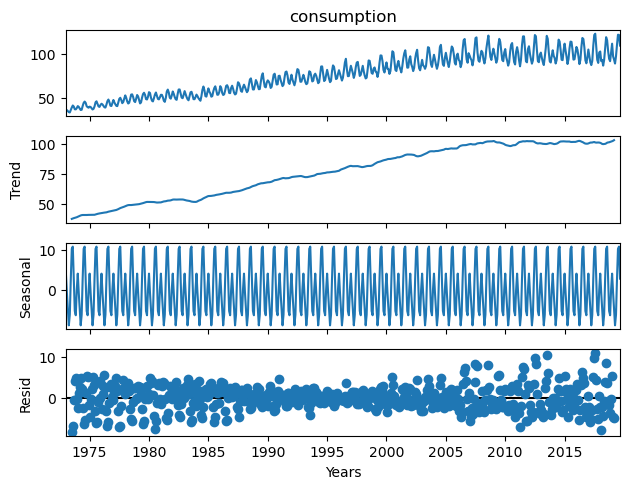

In [41]:
# plotting the charts using decompostion of the data

decom.plot()
plt.xlabel('Years')
plt.show()

# teand is positive
# Seasonality is present

In [42]:
decom_data = pd.concat([decom.observed, decom.trend, decom.seasonal, decom.resid], axis=1)
decom_data.head()


# Creating a dataframe containing columns as the consumption of the electricity and it's decomposition 

,consumption,trend,seasonal,resid
date,,,,
1973-01-01,35.9728,NaN,4.135755,NaN
1973-02-01,36.1334,NaN,-0.705922,NaN
1973-03-01,35.0625,NaN,-4.489678,NaN
1973-04-01,33.8416,NaN,-8.668415,NaN
1973-05-01,33.5107,NaN,-6.044817,NaN


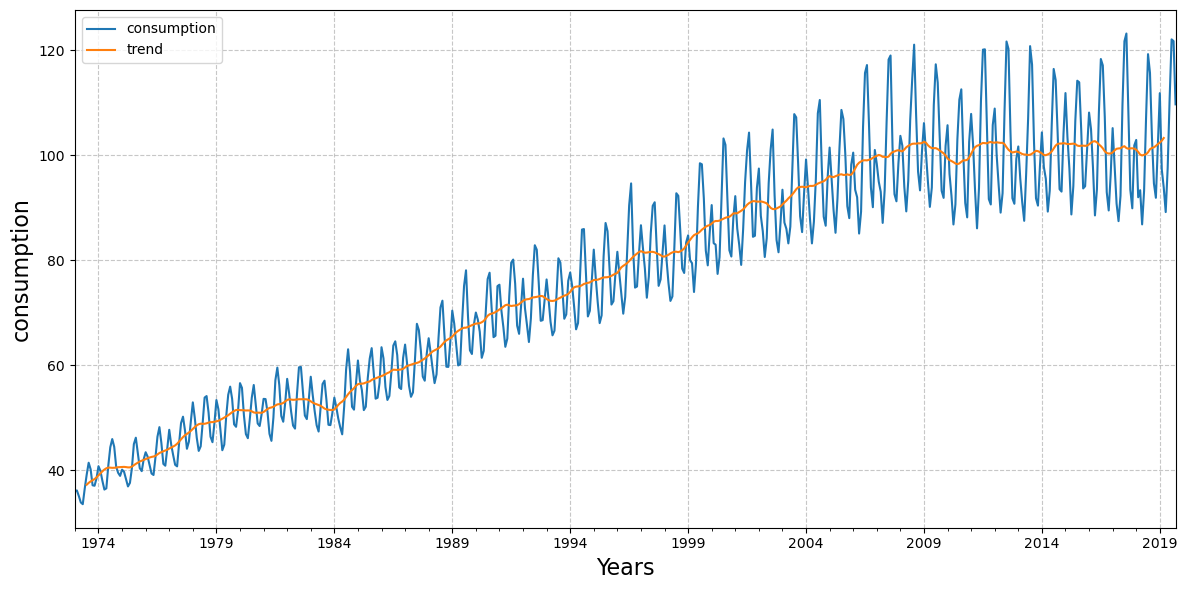

In [43]:
# Plotting trend and consumption

decom_data.loc[:,['consumption', 'trend']].plot(figsize=(12,6))
plt.xlabel('Years', fontsize=16)
plt.ylabel('consumption', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## As per charts till the year 2009, there is an uptend but thereafter consumption is stagnating

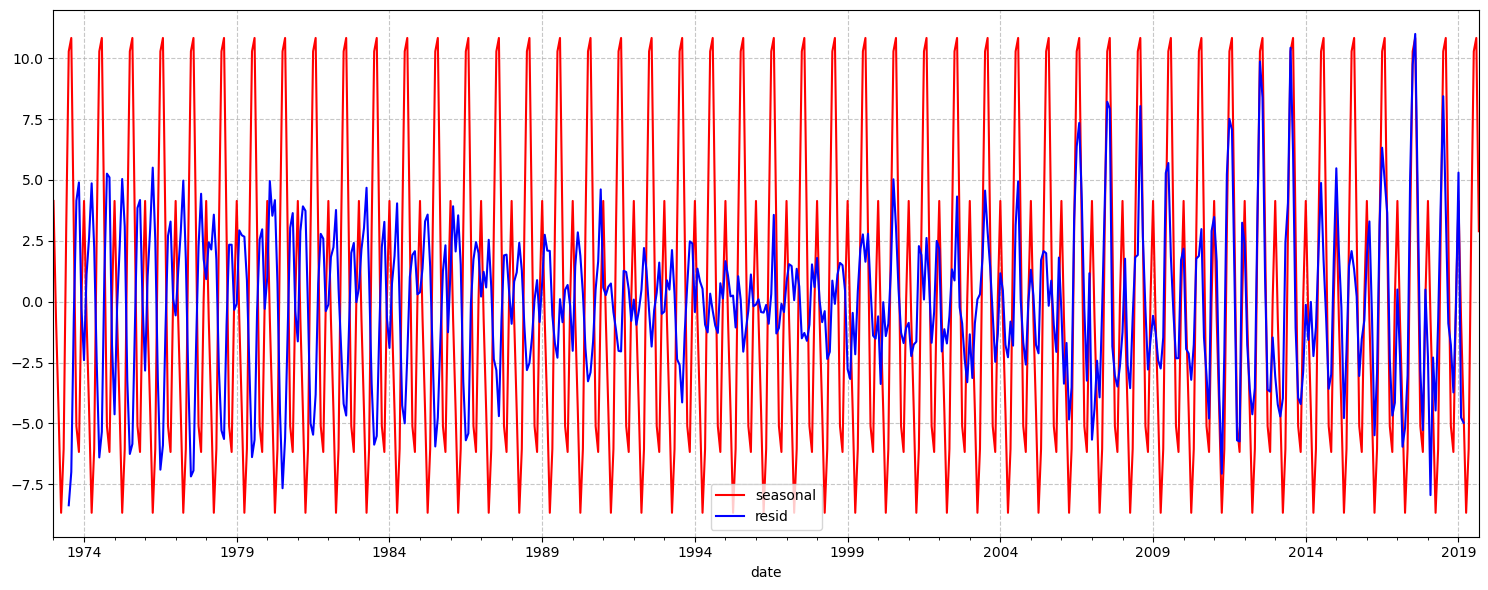

In [44]:
decom_data.loc[:, ['seasonal','resid']].plot(color=['r', 'b'],figsize=(15,6))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# Availablity of seasonlity is confirmed by this chart

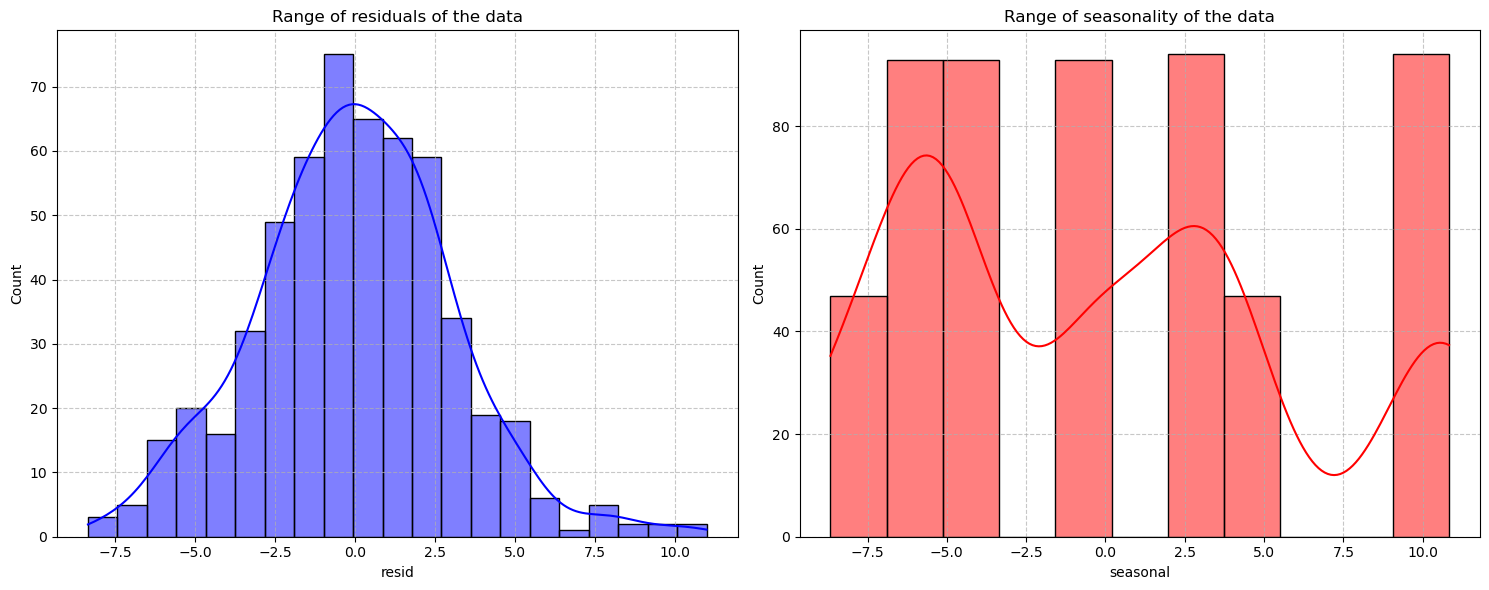

In [45]:
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(15,6))
sns.histplot(decom_data.resid, kde=True, ax=ax1, color='b')
ax1.set_title('Range of residuals of the data')
ax1.grid(True, linestyle='--', alpha=0.7)
sns.histplot(decom_data.seasonal, kde=True, ax=ax2, color='r')
ax2.set_title('Range of seasonality of the data')
ax2.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


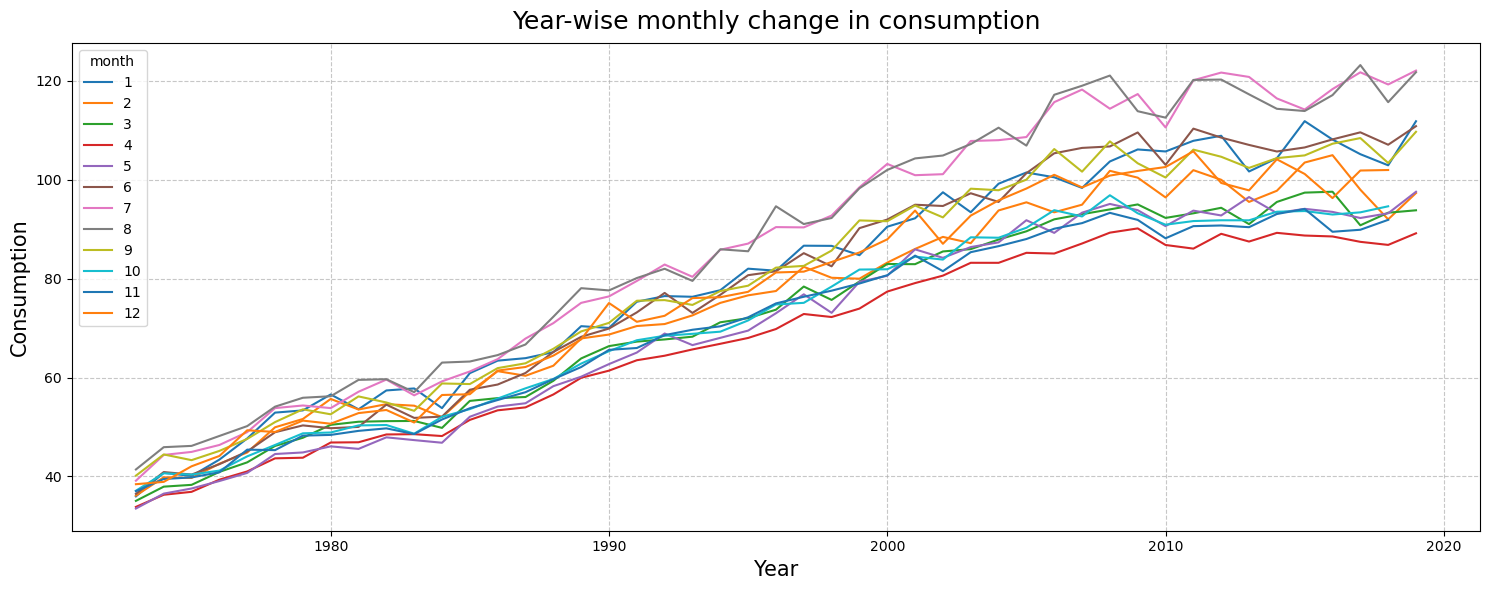

In [46]:
pd.pivot_table(data, values='consumption', index='year', columns='month', aggfunc=np.sum).plot(figsize=(15,6))
plt.ylabel('Consumption', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.title('Year-wise monthly change in consumption', fontsize =18, pad=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

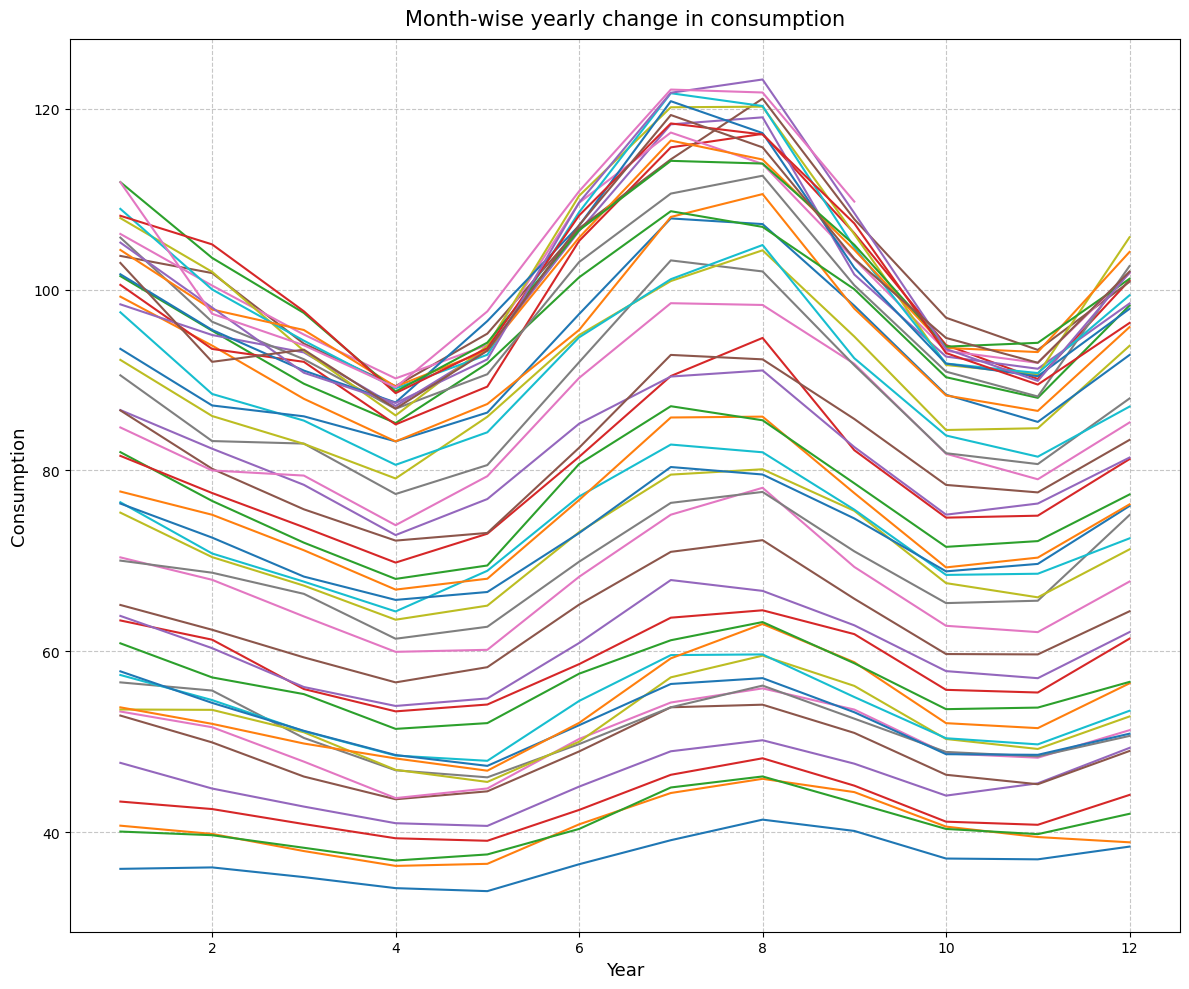

In [47]:
pd.pivot_table(data, values='consumption', index='month', columns='year', aggfunc=np.sum).plot(figsize=(12,10), legend=False)
plt.ylabel('Consumption', fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.title('Month-wise yearly change in consumption', fontsize =15, pad=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

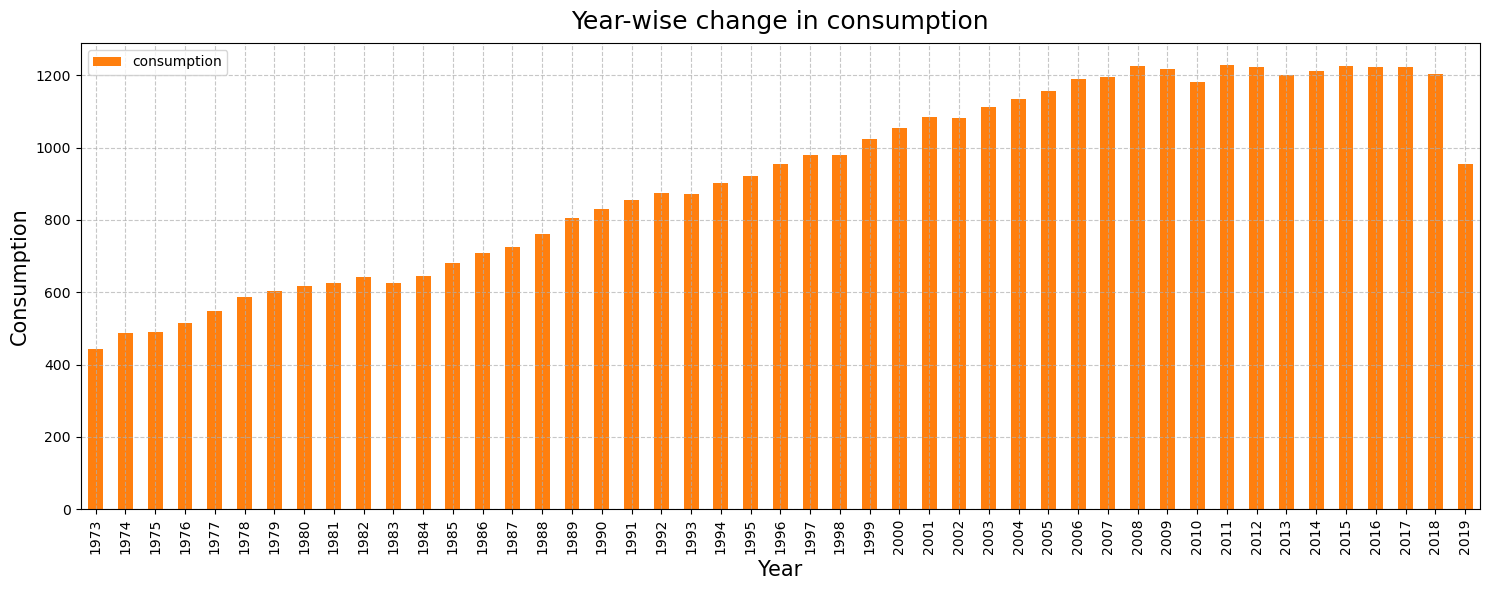

In [48]:
data.loc[:,['year', 'consumption']].groupby(by='year').sum().plot(kind='bar',figsize=(15,6), color='#ff7f0e')
plt.ylabel('Consumption', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.title('Year-wise change in consumption', fontsize =18, pad=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# In year 2019, months "Oct", "Nov" and "Dec" are missing or null

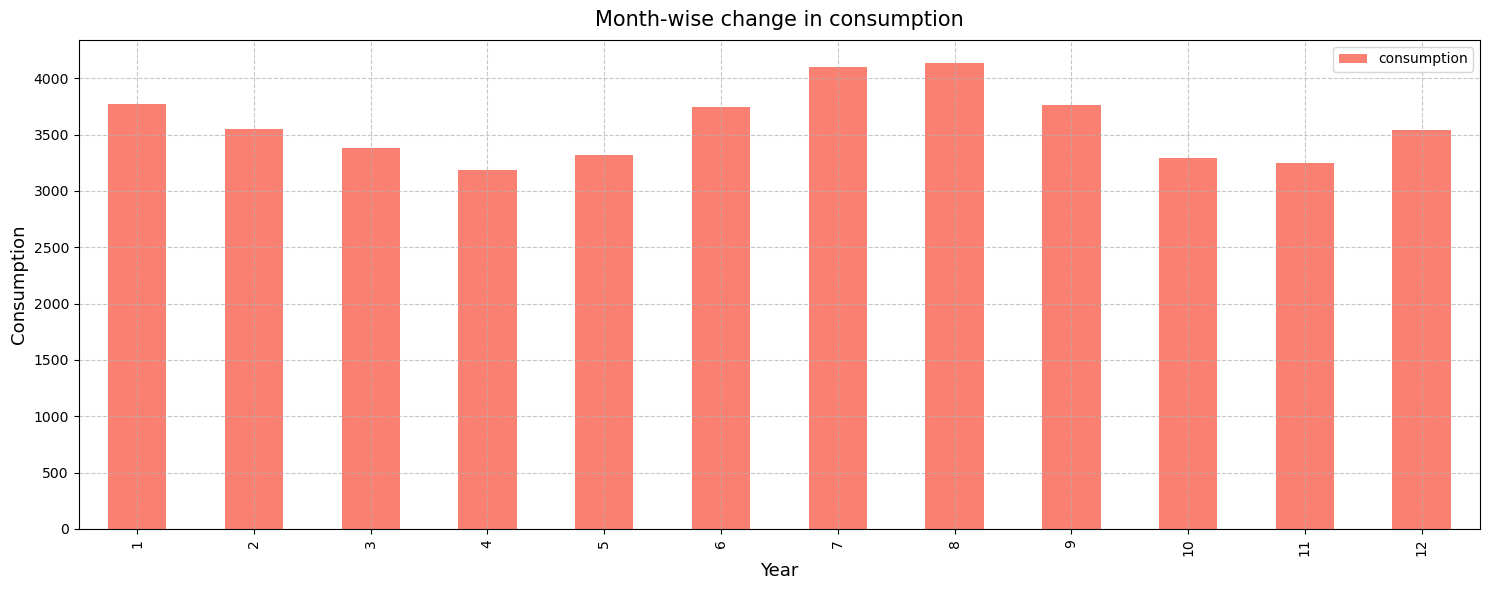

In [49]:
data.loc[:,['consumption', 'month']].groupby(by='month').sum().plot(kind='bar',figsize=(15,6), color='#fa8072')
plt.ylabel('Consumption', fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.title('Month-wise change in consumption', fontsize =15, pad=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# We can clearly see that months 7 and 8 are having highest consumption and months 1 and 2 are having highest consumption so this is 6 months sea

In [50]:
data.drop(columns=['year', 'month'], inplace=True)

# Train-Test Split

In [51]:
start_date_train = '1973-1-1'
end_date_train = '2018-12-1'
start_date_test = '2019-1-1'

In [52]:
train = data.loc[start_date_train:end_date_train,:]
test = data.loc[start_date_test:,:]

In [53]:
train.head()

,consumption
date,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107


In [54]:
test.head()

,consumption
date,
2019-01-01,111.8520
2019-02-01,97.3261
2019-03-01,93.8406
2019-04-01,89.1873
2019-05-01,97.5860


# ETS Model

In [55]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [56]:
def find_best_holt_winters_params(timeseries, trend, seasonal, periods, alpha_range, beta_range, gamma_range):
    best_params = {}
    min_rmse = float('inf')  
    
    print('Evaluating Exponential Smoothing model for', len(alpha_range) * len(beta_range) * len(gamma_range))


    for a in alpha_range:
        for b in beta_range:
            for g in gamma_range:
                model = ExponentialSmoothing(timeseries, trend=trend, seasonal=seasonal, seasonal_periods=periods)
                model_fit = model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
                f_cast = model_fit.predict(start=timeseries.index[0], end=timeseries.index[-1])
                residuals = timeseries - f_cast
                rmse = np.sqrt(np.mean(residuals ** 2))  # Calculate root mean squared error

                if rmse < min_rmse:
                    min_rmse = rmse
                    best_params = {'alpha': a, 'beta': b, 'gamma': g, 'rmse': rmse}

    return best_params



In [58]:
# Values for alpha, beta and gaama

alpha_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 
beta_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  
gamma_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  

In [60]:
print('Best values of smoothing_level, smoothing_trend and smoothing_seasonal respectively and calculated root mean squared error  : ', find_best_holt_winters_params(train.consumption, trend='mul', periods=12, seasonal='mul', alpha_range=alpha_range, beta_range=beta_range, gamma_range=gamma_range))

Evaluating Exponential Smoothing model for 1
Best values of smoothing_level, smoothing_trend and smoothing_seasonal respectively and calculated root mean squared error  :  {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.2, 'rmse': 1.9119148511397337}


C:\Users\navee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [61]:
# Creating ets model

ets_model = ExponentialSmoothing(train.consumption, trend='mul', seasonal='mul', seasonal_periods=12)

C:\Users\navee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [62]:
# Fitting ets model

ets_model = ets_model.fit(smoothing_level=0.6, smoothing_trend=0.1, smoothing_seasonal=0.2)

In [63]:
# Forcasting for train data

ets_model.fittedvalues.head()

date
1973-01-01    36.427191
1973-02-01    34.937379
1973-03-01    33.595703
1973-04-01    32.649314
1973-05-01    33.366142
dtype: float64

In [64]:
# Creating dataframe for train data and forcast data

df_ets_train = pd.concat([train.consumption, ets_model.fittedvalues], axis=1)

In [65]:
# Forcasting for test data

ets_model.forecast(test.shape[0]).head()

2019-01-01    107.487224
2019-02-01    100.024383
2019-03-01     96.112256
2019-04-01     89.691049
2019-05-01     95.780363
Freq: MS, dtype: float64

In [66]:
# Creating dataframe for test data and forcast data

df_ets_test = pd.concat([test.consumption, ets_model.forecast(test.shape[0])], axis=1)

In [67]:
# Correcting column names


df_ets_train.columns = ['Actual', 'predicated']
df_ets_test.columns = ['Actual', 'predicated']

# Error checking

In [68]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [69]:
# For train data

print('MAE_train : ', mean_absolute_error(df_ets_train.Actual, df_ets_train.predicated))
print('MAPE_train : ', mean_absolute_percentage_error(df_ets_train.Actual, df_ets_train.predicated))
print('MSE_train : ', mean_squared_error(df_ets_train.Actual, df_ets_train.predicated))
print('RMSE_train : ', np.sqrt(mean_squared_error(df_ets_train.Actual, df_ets_train.predicated)))

MAE_train :  1.4469576633605175
MAPE_train :  0.01918400330251844
MSE_train :  3.6554183980086696
RMSE_train :  1.9119148511397337


In [70]:
# For test data

print('MAE_train : ', mean_absolute_error(df_ets_test.Actual, df_ets_test.predicated))
print('MAPE_train : ', mean_absolute_percentage_error(df_ets_test.Actual, df_ets_test.predicated))
print('MSE_train : ', mean_squared_error(df_ets_test.Actual, df_ets_test.predicated))
print('RMSE_train : ', np.sqrt(mean_squared_error(df_ets_test.Actual, df_ets_test.predicated)))

MAE_train :  1.59554318737086
MAPE_train :  0.015422540427523211
MSE_train :  4.270992761838139
RMSE_train :  2.0666380335796926


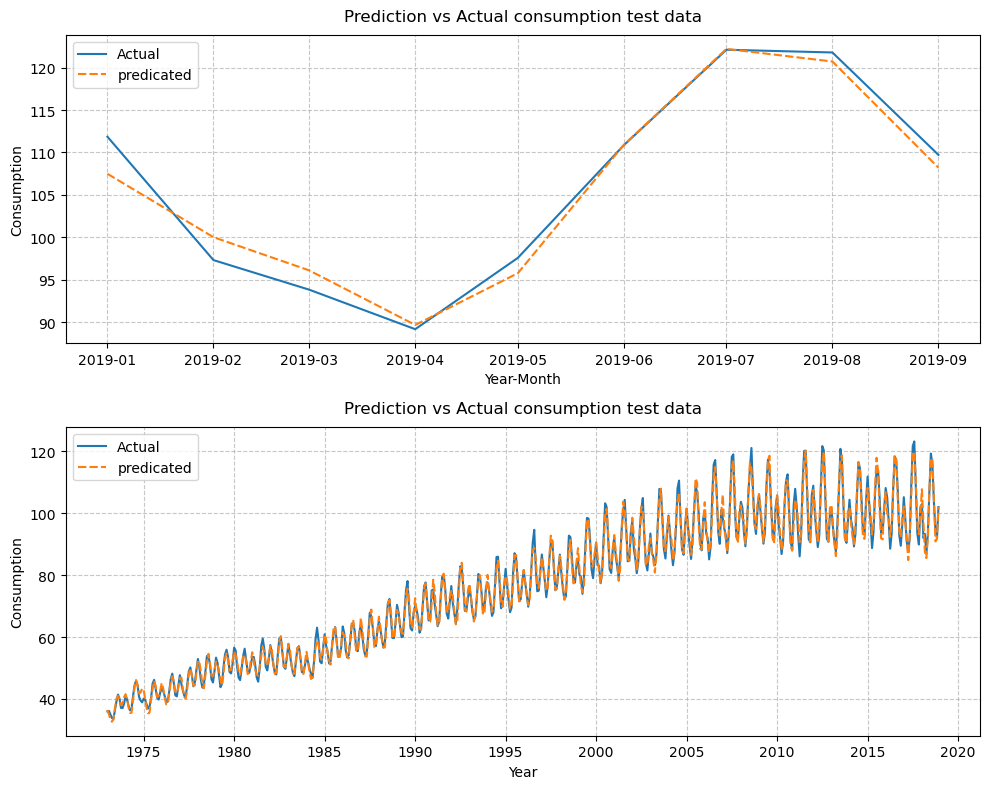

In [71]:
# Visualization 



fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,8))
sns.lineplot(df_ets_test, ax=ax1)
ax1.set_title('Prediction vs Actual consumption test data', pad=10)
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Consumption')
ax1.grid(True, linestyle='--', alpha=0.7)
sns.lineplot(df_ets_train, ax=ax2)
ax2.set_title('Prediction vs Actual consumption test data', pad=10)
ax2.set_xlabel('Year')
ax2.set_ylabel('Consumption')
ax2.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# SARIMA / ARIMA Model

In [72]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### Checking Stationary data

In [73]:
print('p_value : ', adfuller(train.consumption)[1])

# As p_value > 0.05, therefore this data is not stationary

p_value :  0.25666120361577527


In [74]:
print('p_value : ', adfuller(train.consumption.diff(1).dropna())[1])

# As p_value < 0.05, therefore this data is stationary

p_value :  4.749376302937731e-12


In [75]:
print('p_value : ', adfuller(train.consumption.diff(12).dropna())[1])
      
# As p_value < 0.05, therefor this data is stationary

p_value :  6.488980650193468e-08


In [76]:
# Plotting for corelation check

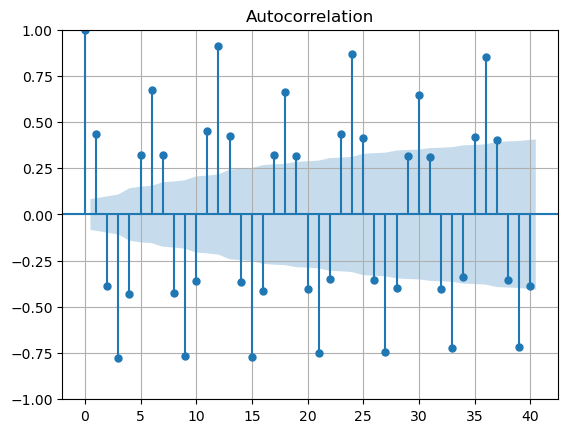

In [77]:
# For the value of "q"

plot_acf(train.consumption.diff(1).dropna(), lags=40)
plt.grid(True)
plt.show()

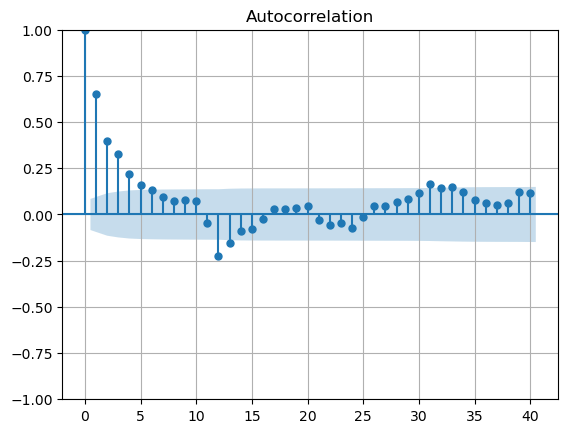

In [78]:
# For the value of "Q"
plot_acf(train.consumption.diff(12).dropna(), lags=40)
plt.grid(True)
plt.show()

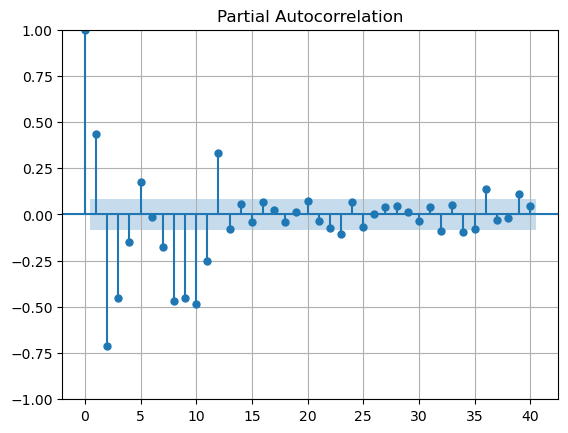

In [79]:
# For the value of "p"

plot_pacf(train.consumption.diff().dropna(), lags=40)
plt.grid(True)
plt.show()

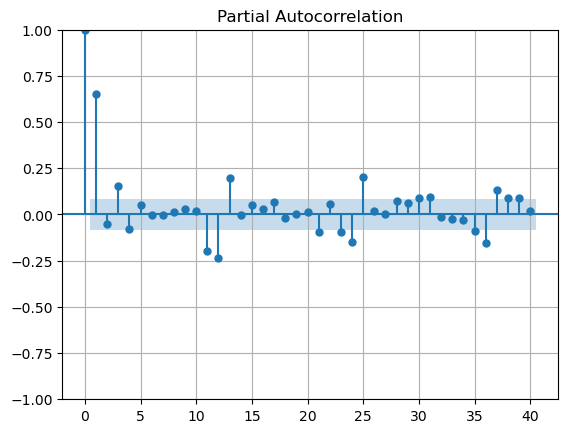

In [80]:
# For the value of "P"
plot_pacf(train.consumption.diff(12).dropna(), lags=40)
plt.grid(True)
plt.show()

In [108]:
# Using Sarima 



import statsmodels.api as sm



model_1 = sm.tsa.SARIMAX(train.consumption, order=(1,2,1), seasonal_order=(1,2,1,12)
                         , enforce_invertibility=False, enforce_stationarity=False
                        ).fit()

C:\Users\navee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\navee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [109]:
# Model 1 summary

print(model_1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        consumption   No. Observations:                  552
Model:             SARIMAX(1, 2, 1)x(1, 2, 1, 12)   Log Likelihood               -1148.406
Date:                            Fri, 16 Feb 2024   AIC                           2306.812
Time:                                    00:26:35   BIC                           2328.004
Sample:                                01-01-1973   HQIC                          2315.119
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1374      0.044     -3.133      0.002      -0.223      -0.051
ma.L1         -1.0000     59.419   

In [110]:
# Creating table containing actual and forcasted values indexed by dates

df_sarima_test_m1 = pd.concat([test, model_1.forecast(test.shape[0])], axis=1)
df_sarima_train_m1 = pd.concat([train.consumption,model_1.fittedvalues], axis=1)

In [111]:
# Correcting column names


df_sarima_train_m1.columns = ['Actual', 'predicated']
df_sarima_test_m1.columns = ['Actual', 'predicated']

In [112]:
df_sarima_train_m1.head()

,Actual,predicated
date,,
1973-01-01,35.9728,0.000000
1973-02-01,36.1334,63.762490
1973-03-01,35.0625,37.426988
1973-04-01,33.8416,33.945250
1973-05-01,33.5107,32.631856


In [113]:
df_sarima_test_m1.head()

,Actual,predicated
2019-01-01,111.8520,106.275006
2019-02-01,97.3261,96.555975
2019-03-01,93.8406,94.469212
2019-04-01,89.1873,89.100840
2019-05-01,97.5860,95.048346


# Error checking

In [114]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [115]:
# For train data

print('MAE_train : ', mean_absolute_error(df_sarima_train_m1.Actual, df_sarima_train_m1.predicated))
print('MAPE_train : ', mean_absolute_percentage_error(df_sarima_train_m1.Actual, df_sarima_train_m1.predicated))
print('MSE_train : ', mean_squared_error(df_sarima_train_m1.Actual, df_sarima_train_m1.predicated))
print('RMSE_train : ', np.sqrt(mean_squared_error(df_sarima_train_m1.Actual, df_sarima_train_m1.predicated)))

MAE_train :  1.896621604252398
MAPE_train :  0.027923961286747397
MSE_train :  10.841564109691559
RMSE_train :  3.2926530503063267


In [116]:
# For test data

print('MAE_test : ', mean_absolute_error(df_sarima_test_m1.Actual, df_sarima_test_m1.predicated))
print('MAPE_test : ', mean_absolute_percentage_error(df_sarima_test_m1.Actual, df_sarima_test_m1.predicated))
print('MSE_test : ', mean_squared_error(df_sarima_test_m1.Actual, df_sarima_test_m1.predicated))
print('RMSE_test : ', np.sqrt(mean_squared_error(df_sarima_test_m1.Actual, df_sarima_test_m1.predicated)))

MAE_test :  1.4554396729660146
MAPE_test :  0.013564793828751951
MSE_test :  4.834654085463125
RMSE_test :  2.1987846837430727


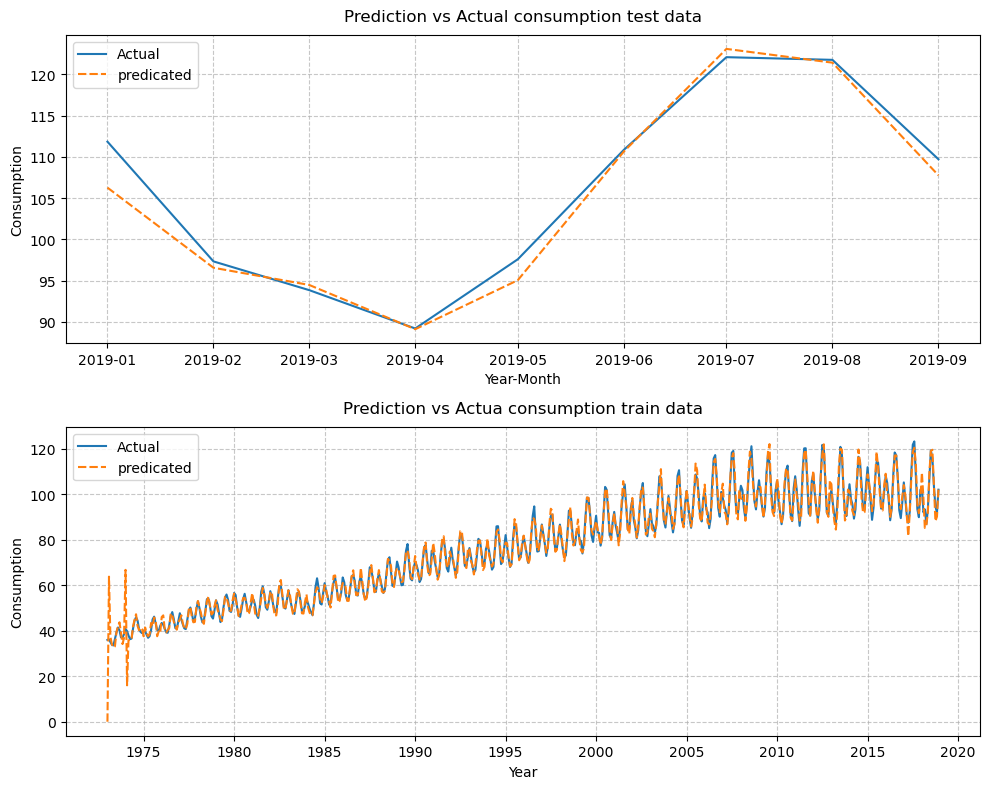

In [117]:
# Visualization 



fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,8))
sns.lineplot(df_sarima_test_m1, ax=ax1)
ax1.set_title('Prediction vs Actual consumption test data', pad=10)
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Consumption')
ax1.grid(True, linestyle='--', alpha=0.7)
sns.lineplot(df_sarima_train_m1, ax=ax2)
ax2.set_title('Prediction vs Actua consumption train data', pad=10)
ax2.set_xlabel('Year')
ax2.set_ylabel('Consumption')
ax2.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Using Auto-Arima

In [64]:
import sys
import itertools
import warnings
import numpy as np
import statsmodels.api as sm

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d, and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q, and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore")  # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                     exog=regressors,
                                                     order=param,
                                                     seasonal_order=param_seasonal,
                                                     enforce_stationarity=False,
                                                     enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except Exception as e:
                print("Error: ", str(e))
                continue

    if best_results is not None:
        print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
        print(best_results.summary().tables[0])
        print(best_results.summary().tables[1])
    else:
        print("No valid model found.")

    # Return the best_results if needed.
    return best_results



In [ ]:
auto_arima(train.consumption, regressors=None, p=[0,1,2,3,4,5], d=[1,2], q=[0,1,2], P=range(0, 2), D=[1], Q=[5,6,7])


# Best params i got - order=(5,1,2), seasonal_order=(1,1,7,12)

In [65]:
# Creating model as per best params

model_2 = sm.tsa.SARIMAX(train.consumption, order=(5,1,2), seasonal_order=(1,1,7,12)
                         , enforce_invertibility=False, enforce_stationarity=False
                        ).fit()

C:\Users\navee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\navee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [66]:
# Model 2 summary

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                               SARIMAX Results                                                
==============================================================================================================
Dep. Variable:                                            consumption   No. Observations:                  552
Model:             SARIMAX(5, 1, 2)x(1, 1, [1, 2, 3, 4, 5, 6, 7], 12)   Log Likelihood                -909.920
Date:                                                Tue, 31 Oct 2023   AIC                           1851.839
Time:                                                        12:54:12   BIC                           1917.658
Sample:                                                    01-01-1973   HQIC                          1877.776
                                                         - 12-01-2018                                         
Covariance Type:                                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3296      0.077     -4.297      0.000      -0.480      -0.179
ar.L2          0.4048      0.080      5.058      0.000       0.248       0.562
ar.L3         -0.0707      0.063     -1.115      0.265      -0.195       0.054
ar.L4          0.0283      0.065      0.436      0.663      -0.099       0.155
ar.L5         -0.0904      0.060     -1.502      0.133      -0.208       0.028
ma.L1          0.0411      0.065      0.630      0.529      -0.087       0.169
ma.L2         -0.7972      0.068    -11.668      0.000      -0.931      -0.663
ar.S.L12      -0.4858      0.398     -1.221      0.222      -1.265       0.294
ma.S.L12      -0.2788      0.398     -0.700      0.484      -1.059       0.501
ma.S.L24      -0.5365      0.307     -1.750      0.080      -1.137       0.064
ma.S.L36       0.0473      0.081      0.584      0.559      -0.111       0.206
ma.S.L48       0.1770      0.079      2.252      0.024       0.023       0.331
ma.S.L60       0.1211      0.069      1.765      0.078      -0.013       0.256
ma.S.L72       0.0727      0.051      1.426      0.154      -0.027       0.173
ma.S.L84      -0.0732      0.052     -1.408      0.159      -0.175       0.029
sigma2         3.2231      0.207     15.607      0.000       2.818       3.628
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 6.19
Prob(Q):                              0.92   Prob(JB):                         0.05
Heteroskedasticity (H):               2.88   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
# Creating table containing actual and forcasted values indexed by dates

df_sarima_test_m2 = pd.concat([test, model_2.forecast(test.shape[0])], axis=1)
df_sarima_train_m2 = pd.concat([train.consumption,model_2.fittedvalues], axis=1)

In [68]:
# Correcting column names


df_sarima_train_m2.columns = ['Actual', 'predicated']
df_sarima_test_m2.columns = ['Actual', 'predicated']

In [69]:
df_sarima_train_m2.head()

,Actual,predicated
date,,
1973-01-01,35.9728,0.000000
1973-02-01,36.1334,32.020348
1973-03-01,35.0625,41.412026
1973-04-01,33.8416,33.215246
1973-05-01,33.5107,35.434091


In [70]:
df_sarima_test_m2.head()

,Actual,predicated
2019-01-01,111.8520,107.213209
2019-02-01,97.3261,98.678549
2019-03-01,93.8406,94.772454
2019-04-01,89.1873,87.851069
2019-05-01,97.5860,93.933668


# Error checking

In [71]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [72]:
# For train data

print('MAE_train : ', mean_absolute_error(df_sarima_train_m2.Actual, df_sarima_train_m2.predicated))
print('MAPE_train : ', mean_absolute_percentage_error(df_sarima_train_m2.Actual, df_sarima_train_m2.predicated))
print('MSE_train : ', mean_squared_error(df_sarima_train_m2.Actual, df_sarima_train_m2.predicated))
print('RMSE_train : ', np.sqrt(mean_squared_error(df_sarima_train_m2.Actual, df_sarima_train_m2.predicated)))

MAE_train :  1.491993623048213
MAPE_train :  0.02220268745269545
MSE_train :  6.155759825099161
RMSE_train :  2.4810803745745846


In [73]:
# For test data

print('MAE_test : ', mean_absolute_error(df_sarima_test_m2.Actual, df_sarima_test_m2.predicated))
print('MAPE_test : ', mean_absolute_percentage_error(df_sarima_test_m2.Actual, df_sarima_test_m2.predicated))
print('MSE_test : ', mean_squared_error(df_sarima_test_m2.Actual, df_sarima_test_m2.predicated))
print('RMSE_test : ', np.sqrt(mean_squared_error(df_sarima_test_m2.Actual, df_sarima_test_m2.predicated)))

MAE_test :  3.4450642806169673
MAPE_test :  0.03137977954973427
MSE_test :  14.975882170600364
RMSE_test :  3.869868495259285


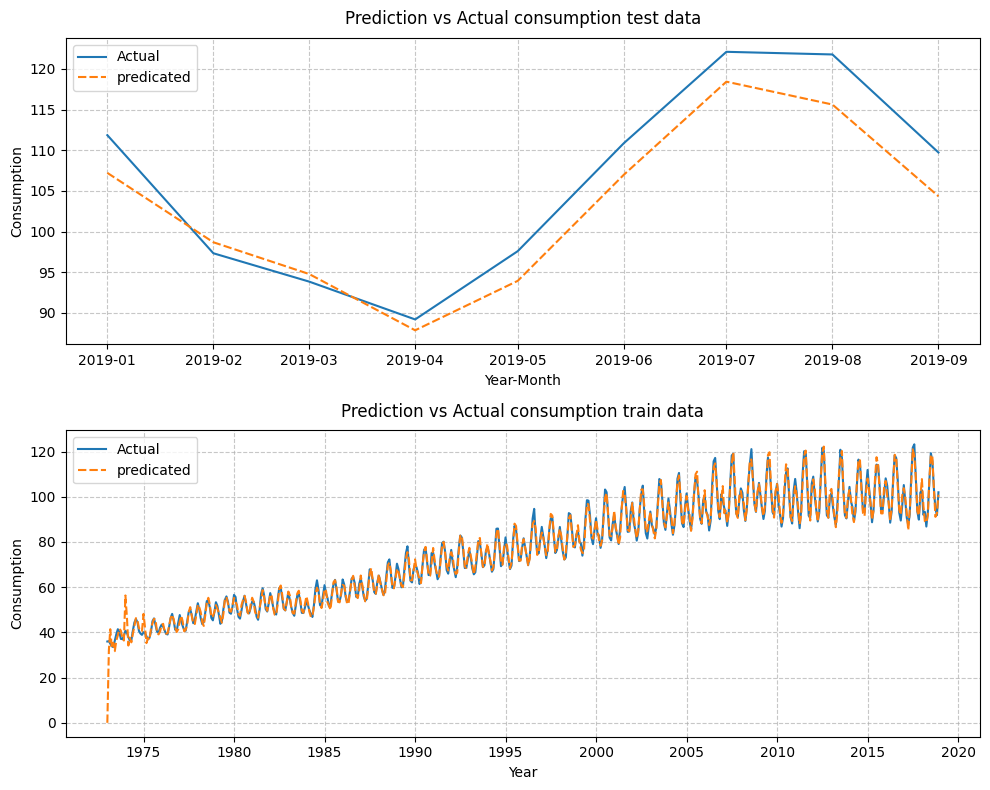

In [74]:
# Visualization 



fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,8))
sns.lineplot(df_sarima_test_m2, ax=ax1)
ax1.set_title('Prediction vs Actual consumption test data', pad=10)
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Consumption')
ax1.grid(True, linestyle='--', alpha=0.7)
sns.lineplot(df_sarima_train_m2, ax=ax2)
ax2.set_title('Prediction vs Actual consumption train data', pad=10)
ax2.set_xlabel('Year')
ax2.set_ylabel('Consumption')
ax2.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Forcasting for next 2 years

### We are using model_2 for forcating consumption for next 2 years

In [75]:
# 2 years = 24 months
# 9 months for testing
# Total 24 + 9 = 33 months

In [76]:
# Creating table containing forcasted values indexed by dates fornext 2 years

Forcast_for_next_2_years = model_2.forecast(33).tail(24)
Forcast_for_next_2_years = pd.DataFrame(Forcast_for_next_2_years)

In [77]:
Forcast_for_next_2_years.columns = ['Consumption']
Forcast_for_next_2_years.head()

,Consumption
2019-10-01,92.792564
2019-11-01,91.645890
2019-12-01,100.463084
2020-01-01,107.673798
2020-02-01,100.207526


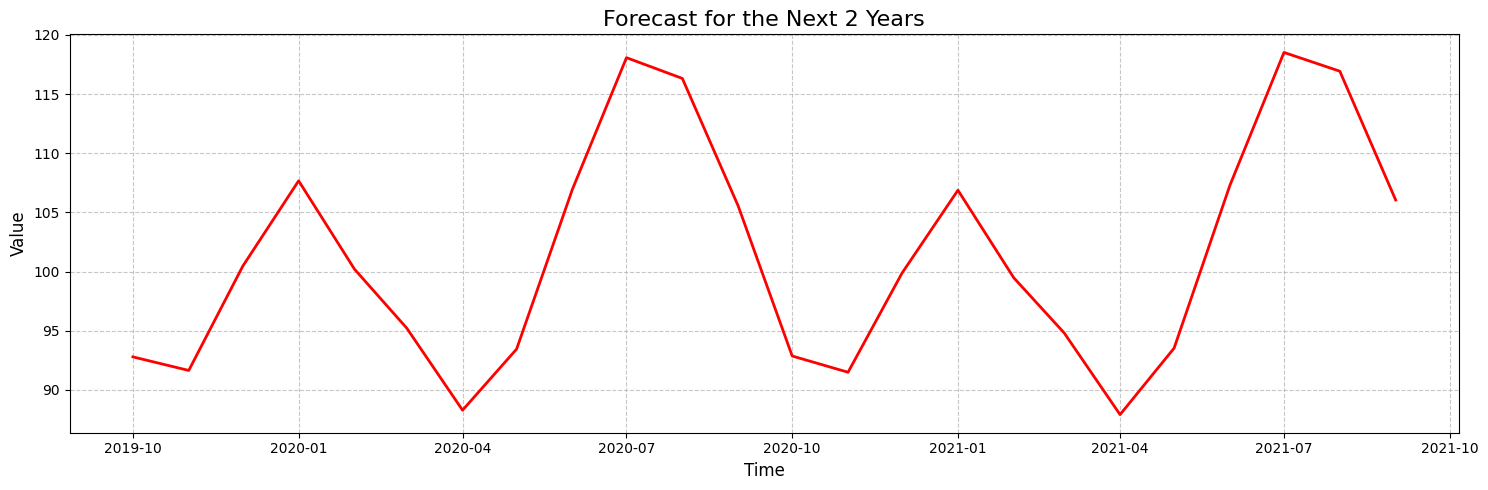

In [78]:
#x_data = Forcast_for_next_2_years.index
#y_data = Forcast_for_next_2_years.Consumption

plt.figure(figsize=(15, 5))
sns.lineplot(y=Forcast_for_next_2_years.Consumption, x=Forcast_for_next_2_years.index, color='r', linewidth=2)

plt.title("Forecast for the Next 2 Years", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# End